Зарплаты

In [3]:
import pandas as pd
import numpy as np

In [4]:
np.__version__

'1.24.3'

In [6]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Метрика: max(0, 1 - (RMSE по зарплатам /33000)) + F1 по профессиям

In [7]:
df_TRAIN_SAL = pd.read_csv('vprod_train/TRAIN_SAL.csv')

/tmp/ipykernel_12694/571475880.py:1: DtypeWarning: Columns (1,16,24,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df_TRAIN_SAL = pd.read_csv('vprod_train/TRAIN_SAL.csv')


In [8]:
df_TRAIN_SAL

,id,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,...,federalDistrictCode,industryBranchName,contactList,company_name,full_company_name,company_inn,company,languageKnowledge,hardSkills,softSkills
0,4e2f52d2-fd76-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,"<p>Доплаты молодым специалистам, возможность с...",NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,3.528053e+09,"{""companycode"":""1023501241390"",""email"":""admin@...",[],[],[]
1,fafe2e23-0e2c-11e5-9cc4-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МЕДИ...",4.714024e+09,"{""companycode"":""1104714000115"",""email"":""llm289...",[],[],[]
2,7eb9edc1-fd76-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,"<p>&nbsp;</p> <p>Фельдшер отделения СМП, Ковжи...",NaN,NaN,Полная занятость,False,...,2.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОЛОГОДСК...,3.508001e+09,"{""companycode"":""1023502092360"",""email"":""vtsrb....",[],[],[]
3,2e68ddc3-0499-11e5-b3df-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,БЮДЖЕТНОЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧР...,3.604006e+09,"{""companycode"":""7df86000-b265-11e7-8d40-736ab1...",[],[],[]
4,8460a3b2-fd7e-11e4-8a5b-3bdbd1a6e39d,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ВОРОНЕЖСК...,3.652003e+09,"{""companycode"":""1023601511196"",""email"":""mail@t...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631112,cd727588-391d-11ef-974d-d549be31d974,NaN,False,NaN,NaN,<p><strong>Мы ценим наших сотрудников и гарант...,NaN,NaN,Полная занятость,False,...,1.0,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛУКО...",7.701286e+09,"{""companycode"":""1027700000679"",""email"":""luknef...",[],[],[]
631113,d9c5fa08-391d-11ef-bcaf-632315a70518,NaN,False,NaN,NaN,NaN,NaN,NaN,Сезонная,False,...,3.0,NaN,NaN,NaN,"ОТКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""САХАРНЫЙ ЗАВОД ...",2.341007e+09,"{""companycode"":""1022304292581"",""email"":""s.pono...",[],[],[]
631114,e1ff8978-391d-11ef-98b6-e73e8fa159bf,NaN,False,NaN,NaN,<p>Возможность работы в порядке внешнего&nbsp;...,NaN,NaN,Частичная занятость,False,...,1.0,NaN,NaN,NaN,ОБЛАСТНОЕ БЮДЖЕТНОЕ ПРОФЕССИОНАЛЬНОЕ ОБРАЗОВАТ...,4.633002e+09,"{""companycode"":""1024601218289"",""email"":""zh_art...",[],[],[]
631115,e58be488-391d-11ef-8f5c-e7d0d2cf29b1,NaN,False,NaN,NaN,<p>Ответственность</p>,NaN,NaN,Полная занятость,False,...,4.0,NaN,NaN,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,1.215207e+09,"{""companycode"":""1161215050480"",""email"":""uoa-te...",[],[],[]


<Axes: >

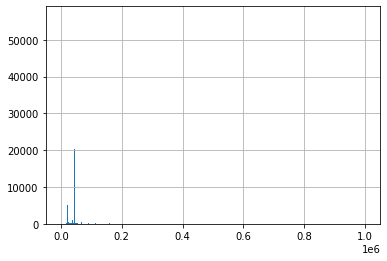

In [9]:
df_TRAIN_SAL['salary'].hist(bins=10000)

In [10]:
df_TRAIN_SAL['salary'].median(), df_TRAIN_SAL['salary'].min(), df_TRAIN_SAL['salary'].max()

(32000.0, 0, 999999)

In [11]:
#!ВАЖНО - в тестовом датасете не будет столбцов salary_min и salary_max
df_TRAIN_SAL.columns

Index(['id', 'academic_degree', 'accommodation_capability',
       'accommodation_type', 'additional_premium', 'additional_requirements',
       'bonus_type', 'measure_type', 'busy_type', 'career_perspective',
       'change_time', 'code_external_system', 'code_profession',
       'code_professional_sphere', 'company_code', 'contact_person',
       'contact_source', 'data_ids', 'date_create', 'date_modify', 'deleted',
       'education', 'education_speciality', 'foreign_workers_capability',
       'metro_ids', 'is_mobility_program', 'is_moderated',
       'is_uzbekistan_recruitment', 'is_quoted', 'need_medcard', 'oknpo_code',
       'okso_code', 'original_source_type', 'other_vacancy_benefit',
       'position_requirements', 'position_responsibilities',
       'publication_period', 'published_date', 'regionName', 'regionNameTerm',
       'company_business_size', 'required_certificates',
       'required_drive_license', 'required_experience',
       'retraining_capability', 'retraining_

In [12]:
df_TRAIN_SAL[['vacancy_address_latitude', 'vacancy_address_longitude',
       'vacancy_benefit_ids', 'vacancy_name', 'visibility', 'work_places',
       'professionalSphereName', 'federalDistrictCode', 'industryBranchName',
       'contactList', 'company_name', 'full_company_name', 'company_inn',
       'company', 'languageKnowledge', 'hardSkills', 'softSkills']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631117 entries, 0 to 631116
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vacancy_address_latitude   629449 non-null  float64
 1   vacancy_address_longitude  629449 non-null  float64
 2   vacancy_benefit_ids        23516 non-null   object 
 3   vacancy_name               631117 non-null  object 
 4   visibility                 631117 non-null  object 
 5   work_places                631117 non-null  int64  
 6   professionalSphereName     631103 non-null  object 
 7   federalDistrictCode        631115 non-null  float64
 8   industryBranchName         2103 non-null    object 
 9   contactList                0 non-null       float64
 10  company_name               0 non-null       float64
 11  full_company_name          631069 non-null  object 
 12  company_inn                630838 non-null  float64
 13  company                    63

In [13]:
#'change_time' 'date_create', 'date_modify' 'published_date' время перевести в годы месяцы
# 'languageKnowledge', 'hardSkills', 'softSkills' раскрыть из json
full_col = ['id', 'academic_degree', 'accommodation_capability', 'additional_requirements', 'busy_type',
             'career_perspective','date_modify', 'education', 'education_speciality', 'need_medcard',
              'original_source_type','position_requirements', 'position_responsibilities',
             'regionName', 'company_business_size', 'required_certificates',
             'required_drive_license', 'required_experience', 'retraining_grant', 'schedule_type',
              'social_protected_ids', 'source_type', 
              'state_region_code', 'vacancy_address', 'vacancy_address_code',
             'vacancy_address_latitude', 'vacancy_address_longitude',
             'vacancy_benefit_ids', 'vacancy_name', 
             'professionalSphereName', 'federalDistrictCode', 'full_company_name',
             'languageKnowledge', 'hardSkills', 'softSkills']
col_ = ['id', 'busy_type','date_modify', 'education', 'education_speciality', 'position_requirements', 
       'position_responsibilities',
             'regionName', 'company_business_size', 'required_certificates',
             'required_drive_license', 'required_experience', 'retraining_grant', 'schedule_type',
              'social_protected_ids', 'source_type', 'vacancy_address_code','vacancy_name', 
             'professionalSphereName', 'federalDistrictCode',]
col = [ 'busy_type','education', 'education_speciality', 'regionName', 'company_business_size', 
       'required_experience',  'schedule_type', 'source_type', 'professionalSphereName', 'federalDistrictCode',]

df_TRAIN_SAL[col].head(10)

,busy_type,education,education_speciality,regionName,company_business_size,required_experience,schedule_type,source_type,professionalSphereName,federalDistrictCode
0,Полная занятость,Среднее профессиональное,Сестринское дело,Вологодская область,MIDDLE,0.0,Сменный график,Работодатель,Здравоохранение и социальное обеспечение,2.0
1,Полная занятость,Среднее профессиональное,NaN,Ленинградская область,SMALL,0.0,Сменный график,Работодатель,Здравоохранение и социальное обеспечение,2.0
2,Полная занятость,Среднее профессиональное,NaN,Вологодская область,SMALL,0.0,Сменный график,Работодатель,Здравоохранение и социальное обеспечение,2.0
3,Полная занятость,Высшее,NaN,Воронежская область,SMALL,0.0,Полный рабочий день,Работодатель,Здравоохранение и социальное обеспечение,1.0
4,Полная занятость,Среднее профессиональное,лечебное дело,Воронежская область,LARGE,0.0,Полный рабочий день,Работодатель,Здравоохранение и социальное обеспечение,1.0
5,Полная занятость,Среднее профессиональное,Лечебное дело,Воронежская область,LARGE,0.0,Полный рабочий день,Работодатель,Здравоохранение и социальное обеспечение,1.0
6,Полная занятость,Высшее,Лечебное дело,NaN,SMALL,0.0,Полный рабочий день,Работодатель,Здравоохранение и социальное обеспечение,1.0
7,Полная занятость,Высшее,NaN,Тверская область,LARGE,0.0,Сменный график,Работодатель,Здравоохранение и социальное обеспечение,1.0
8,Полная занятость,Высшее,NaN,Тверская область,LARGE,0.0,Полный рабочий день,Работодатель,Здравоохранение и социальное обеспечение,1.0
9,Полная занятость,Высшее,NaN,Московская область,BIG,3.0,Сменный график,Работодатель,Здравоохранение и социальное обеспечение,1.0


In [14]:
df_TRAIN_SAL['education_speciality'].value_counts()

education_speciality
Лечебное дело                                       6503
Сестринское дело                                    5264
Юриспруденция                                       4440
Ничего не выбрано                                   3936
Бухгалтерский учет, анализ и аудит                  3395
                                                    ... 
Рентенология                                           1
токарь, сварщик                                        1
Физика, астрономия                                     1
Лесохозяйственное или лесоинженерное образование       1
учитель или педагог                                    1
Name: count, Length: 6003, dtype: int64

In [15]:
df_TRAIN_SAL['education'].fillna(0).map({'Не указано': 0,'Основное общее': 1,'Среднее общее': 2,'Среднее': 3,
                               'Среднее профессиональное': 4, 'Незаконченное высшее': 5,'Высшее': 6,})

0         4
1         4
2         4
3         6
4         4
         ..
631112    3
631113    0
631114    6
631115    0
631116    0
Name: education, Length: 631117, dtype: int64

In [16]:
#логарифмы зарплаты
df_TRAIN_SAL['salary']

0         33500
1         60000
2         25000
3         19242
4         26958
          ...  
631112    45000
631113    35000
631114    19242
631115    19242
631116    60000
Name: salary, Length: 631117, dtype: int64

In [23]:
X_train_part, X_valid, Y_train_part, Y_valid = train_test_split(df_TRAIN_SAL[col].fillna(0), 
                                                                df_TRAIN_SAL['salary'], 
                                                                test_size=0.20, shuffle = True)

In [24]:
Y_train_part_ = np.log(Y_train_part)
Y_valid_ = np.log(Y_valid)

/home/tanya/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
cat_features = ['busy_type','education', 'education_speciality', 'regionName', 'company_business_size', 
                'schedule_type', 'source_type', 'professionalSphereName']

In [26]:
train_pool = Pool(X_train_part, Y_train_part, cat_features=cat_features)
test_pool = Pool(X_valid, Y_valid, cat_features=cat_features)

In [ ]:
#train_pool = Pool(X_train_part, Y_train_part_, cat_features=cat_features)
#test_pool = Pool(X_valid, Y_valid_, cat_features=cat_features)

In [27]:
model = CatBoostRegressor(
    learning_rate=0.1,
    iterations=10000,
    max_depth = 6, 
)
model.fit(train_pool, eval_set=test_pool, #metric_period=10, plot=True, 
        early_stopping_rounds = 100, use_best_model=True, verbose=500)

0:	learn: 23616.5276698	test: 24001.7952229	best: 24001.7952229 (0)	total: 171ms	remaining: 28m 31s
500:	learn: 17909.8721951	test: 18302.0015167	best: 18302.0015167 (500)	total: 51.8s	remaining: 16m 22s
1000:	learn: 17639.2770763	test: 18150.2777417	best: 18149.2054384 (998)	total: 1m 47s	remaining: 16m 4s
1500:	learn: 17476.6369896	test: 18081.7662643	best: 18081.7662643 (1500)	total: 2m 44s	remaining: 15m 29s
2000:	learn: 17353.6962108	test: 18034.5277785	best: 18034.2519325 (1996)	total: 3m 39s	remaining: 14m 37s
2500:	learn: 17251.8061574	test: 17982.0453303	best: 17981.9912474 (2499)	total: 4m 35s	remaining: 13m 46s
3000:	learn: 17154.9906674	test: 17943.1373922	best: 17943.1358392 (2999)	total: 5m 33s	remaining: 12m 56s
3500:	learn: 17077.5456233	test: 17918.0564880	best: 17918.0564880 (3500)	total: 6m 30s	remaining: 12m 4s
4000:	learn: 17010.9252229	test: 17897.5216379	best: 17897.5216379 (4000)	total: 7m 25s	remaining: 11m 7s
4500:	learn: 16943.0659775	test: 17872.6224775	best

In [28]:
#np.exp()
valid_predict = model.predict(test_pool)

In [29]:
rmse = mean_squared_error(Y_valid, valid_predict, squared=False)
rmse.round(2)

17812.79

In [31]:
custom_metric = max(0,1-(rmse/33000))
custom_metric

0.4602186109484687

In [30]:
#```сохраним модель
model.save_model('model_1.cbm')   
#для загрузки использовать
#model.load_model('model_1.cbm')```